In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import joblib

# Detect Ransomware

In [2]:
df1 = pd.read_csv('./datasets/ransomware.csv')

df1

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [3]:
df1 = pd.read_csv('./datasets/ransomware.csv')

# delete the useless columns :
df1 = df1.drop(columns=['FileName','md5Hash'])

# replace the value repeated : MD5HASH - DebugSize - MajorOSVersion - BitcoinAddresses - NumberOfSections - SizeOfStackReserve
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve","MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df1[col] = df1[col].astype('category')
    df1[col] = df1[col].cat.codes

# delete all the duplicated rows :
df1 = df1.drop_duplicates(keep='last')

# save the new datasets into new csv file :
df1.to_csv("./datasets/df_clear.csv")

In [4]:
df1 = pd.read_csv("./datasets/df_clear.csv")
df1

,Unnamed: 0,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,1,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
1,3,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
2,4,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1
3,5,4,11,319776,10,10,374944,9208,312608,14,10,6,9,16736,2072,0,1
4,7,4,11,197888,10,10,229024,112,187208,14,10,6,9,16736,1328,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,62480,1,0,0,1,4,0,0,4096,6,0,2,12,0,23504,0,0
32252,62481,1,0,0,7,10,0,0,0,7,0,6,12,0,15704,0,0
32253,62482,1,0,0,0,4,0,0,404908,2,50,10,12,0,2364,0,0
32254,62483,1,0,0,0,4,14448,70,4096,8,0,3,12,0,130296,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [6]:
# Transoform into List :
x1 = df1.iloc[:, 1:-1].values
y1 = df1.iloc[:,-1].values

print("The features (Machine ... Bitcoin@) : ")
y1

# 0 - Non-Benign    1 - Benign

The features (Machine ... Bitcoin@) : 


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
# Generate random classification data
x1, y1 = make_classification(n_samples=1000, n_features=15, n_classes=2,random_state=0)

# Split data into training and testing sets
# 20% testing and 80% train
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100,random_state=0)

# Fit the Random Forest Classifier to the training data
rf.fit(x1_train, y1_train)

# Save the trained model to a file
joblib.dump(rf, './trained_model/random_forest_model.pkl')

# Predict the classes of the testing set
y1_pred = rf.predict(x1_test)

# Print the accuracy of the model
print(f"Accuracy: {rf.score(x1_test, y1_test) * 100:.2f}%")

Accuracy: 97.00%


In [8]:
# Calculate cross-validation scores for the model
# cross-validation scores for a model : a way of evaluating the performance of the model on a given dataset.
scores = cross_val_score(rf, x1, y1, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Mean score refers to the average score obtained from a set of scores.
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.99  0.96  0.935 0.95  0.96 ]
Mean Score: 0.959


In [9]:
# Load new data for prediction
x1_new = [[1, 1, 0, 0, 6, 2, 0, 8192, 8, 0, 3, 1048576, 34112, 672,0],[3, 0, 0, 0, 6, 2, 0, 8192, 8,	0, 0, 0, 0, 672,0 ]]

y_actual = [1,1]
# Use the model to predict the classes of the new data
y_pred = rf.predict(x1_new)

# Print the predicted classes of the new data
print("Predicted classes:", y_pred)

# Compare predicted classes with actual classes
for i in range(len(y_pred)): 
 print("Predicted class:", y_pred[i], "Actual class:", y_actual[i])

Predicted classes: [1 1]
Predicted class: 1 Actual class: 1
Predicted class: 1 Actual class: 1


Confusion Matrix:
[[95  3]
 [ 3 99]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97       102

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



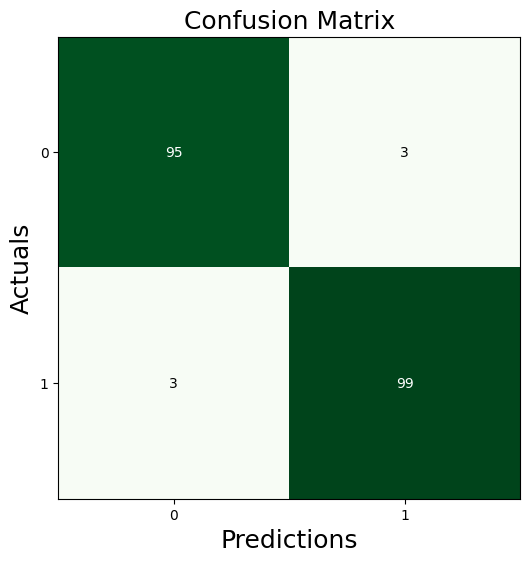

In [10]:
# Use the model to predict the classes of the testing set
y_pred = rf.predict(x1_test)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
cm=confusion_matrix(y1_test, y_pred)
print(cm)

print("\n Classification Report:")
print(classification_report(y1_test, y_pred))

fig, ax = plot_confusion_matrix(conf_mat=cm , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97       102

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



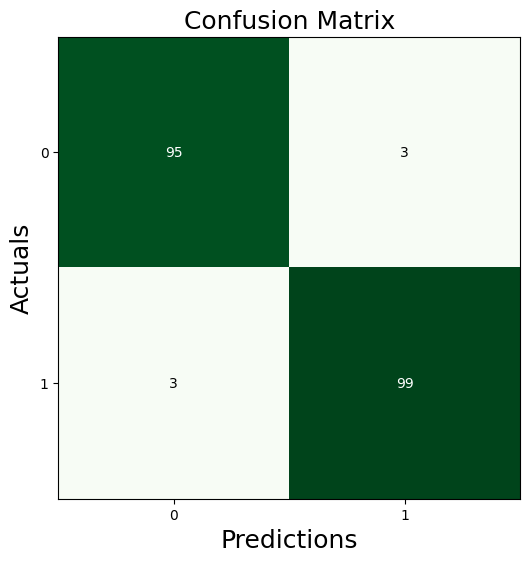

In [11]:
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

# Load the trained LightGBM model
loaded_model = joblib.load('./trained_model/random_forest_model.pkl')  # Load the model from the saved file

# Evaluate the model's performance on the testing data
accuracy = rf.score(x1_test, y1_test)
print("Accuracy:", accuracy)

# Make predictions using the loaded model on the testing data
y1_pred = loaded_model.predict(x1_test)

# Print classification report
print("Classification Report:")
print(classification_report(y1_test, y1_pred))

# Plot confusion matrix
cm3=confusion_matrix(y1_test, y1_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm3 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()